In [1]:
#importing useful libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math

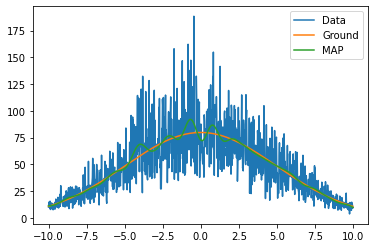

In [2]:
class curveFinder:
    
    '''This method creates synthetic data assuming Gaussian noise on a function with form of ...'''
    @staticmethod
    def dataGenerator(length, var, mean, sigma):
        
        def function(x, mean, sigma):

            y = 1000*(math.e**((-1*(x - mean)**2)/(2*sigma**2)))/(math.sqrt(2*math.pi)*sigma)
            return y

        xground = np.linspace(-10, 10, length)
        yground = function(xground, mean, sigma)

        #vmatrix = np.diag(np.full(len(yground), var))
        data = np.random.gamma(10, yground/10, len(yground))
        return xground, yground, data

    @staticmethod
    def matGenerator(nIndPts, xvect, nfine):

        def kernal(x, y):

            #Define constants for square kernal
            lambd = 10
            lexp = 1
            
            #Create empty matrix for covariance
            C = np.zeros((len(x), len(y)))
            
            #loop over all indecies in covariance matrix
            for i in range(len(x)):
                for j in range(len(y)):
                    #Determine each element of covariance matrix
                    C[i][j] = (lambd**2)*(math.exp(((-1)*((x[i]-y[j])**2))/(lexp**2)))
    
            #Return Covariance Matrix
            return C

        xindPts = np.linspace(-10, 10, nIndPts)
        xfine = np.linspace(-10, 10, nfine)
        C1 = kernal(xindPts, xvect)
        C2 = kernal(xvect, xindPts)
        C3 = kernal(xindPts, xindPts)
        C4 = kernal(xvect, xvect)
        C5 = kernal(xfine, xindPts)

        return C1, C2, C3, C4, C5

    @staticmethod
    def mvMeanCov(C1, C2, C3, C4, data, var):

        M = (1/var)*np.dot(np.linalg.inv(C3), np.dot(C1, np.dot(C2, np.linalg.inv(C3))))
        b = b = (1/var)*np.dot(np.linalg.inv(C3), np.dot(C1, data))

        mean = np.dot(np.linalg.inv(np.linalg.inv(C3) + M), b)
        covariance = np.linalg.inv(np.linalg.inv(C3) + M)

        return mean, covariance

    @staticmethod
    def sampler(mean, covariance, nSamples):

        samples = np.random.multivariate_normal(mean, covariance, size = nSamples)

        return samples

    @staticmethod
    def MAP(samples):

        return np.mean(samples, axis = 0)

    @staticmethod
    def fineGrid(map, Cind, Cfine):
        
        fineMAP = np.dot(Cfine, np.dot(np.linalg.inv(Cind), map))

        return fineMAP




mean = 0
sigma = 5
var = 10
nData = 1000
nInd = 55
nsamples = 100
nfine = 500
x, yground, data = curveFinder.dataGenerator(nData, var, mean, sigma)



C1, C2, C3, C4, C5 = curveFinder.matGenerator(nInd, x, nfine)

mutilda, ctilda = curveFinder.mvMeanCov(C1, C2, C3, C4, data, var)

samples = curveFinder.sampler(mutilda, ctilda, nsamples)
map = curveFinder.MAP(samples)
fineMAP = curveFinder.fineGrid(map, C3, C5)

plt.plot(x, data, label = "Data")
plt.plot(x, yground, label = "Ground")
#plt.plot(np.linspace(-15, -1, nInd), map)
plt.plot(np.linspace(-10, 10, nfine), fineMAP, label = "MAP")
plt.legend()